In [55]:
import findspark
findspark.init()

In [56]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('app').getOrCreate()

In [57]:
df=spark.read.csv('f:\\datasets\\credit_card_data.csv',header=True,inferSchema=True)

df.limit(6).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [58]:
df.printSchema()

root
 |-- CUST_ID: string (nullable = true)
 |-- BALANCE: double (nullable = true)
 |-- BALANCE_FREQUENCY: double (nullable = true)
 |-- PURCHASES: double (nullable = true)
 |-- ONEOFF_PURCHASES: double (nullable = true)
 |-- INSTALLMENTS_PURCHASES: double (nullable = true)
 |-- CASH_ADVANCE: double (nullable = true)
 |-- PURCHASES_FREQUENCY: double (nullable = true)
 |-- ONEOFF_PURCHASES_FREQUENCY: double (nullable = true)
 |-- PURCHASES_INSTALLMENTS_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_FREQUENCY: double (nullable = true)
 |-- CASH_ADVANCE_TRX: integer (nullable = true)
 |-- PURCHASES_TRX: integer (nullable = true)
 |-- CREDIT_LIMIT: double (nullable = true)
 |-- PAYMENTS: double (nullable = true)
 |-- MINIMUM_PAYMENTS: double (nullable = true)
 |-- PRC_FULL_PAYMENT: double (nullable = true)
 |-- TENURE: integer (nullable = true)



In [59]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

def null_value_calc(df):
    null_columns_counts = []
    numRows = df.count()
    for k in df.columns:
        nullRows = df.where(col(k).isNull()).count()
        if(nullRows > 0):
            temp = k,nullRows,(nullRows/numRows)*100
            null_columns_counts.append(temp)
    return(null_columns_counts)

null_columns_calc_list = null_value_calc(df)
print("Null COlumns calc list " ,null_columns_calc_list)
#schema = StructType([StructField("M1", IntegerType(), True),StructField("M2", IntegerType(), True),StructField("M3", IntegerType(), True)])
#spark.createDataFrame(data=[(5,6,7),(5,6,7)],schema=schema).show()
spark.createDataFrame(null_columns_calc_list, ['Column_Name', 'Null_Values_Count','Null_Value_Percent']).show()

Null COlumns calc list  [('CREDIT_LIMIT', 1, 0.0111731843575419), ('MINIMUM_PAYMENTS', 313, 3.4972067039106145)]
+----------------+-----------------+------------------+
|     Column_Name|Null_Values_Count|Null_Value_Percent|
+----------------+-----------------+------------------+
|    CREDIT_LIMIT|                1|0.0111731843575419|
|MINIMUM_PAYMENTS|              313|3.4972067039106145|
+----------------+-----------------+------------------+



In [60]:
from pyspark.sql.functions import *
def fill_with_mean(df, include=set()): 
    stats=df.agg(*(avg(c).alias(c) for c in df.columns if c in include)) 
    return df.na.fill(stats.first().asDict())

columns= df.columns

columns= columns[1:]
df =fill_with_mean(df, columns)

df.limit(5).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [36]:
from pyspark.ml.feature import VectorAssembler
input_columns=df.columns
input_columns=input_columns[1:]
vecAssembler=VectorAssembler(inputCols=input_columns,outputCol="features")
df_kmeans=vecAssembler.transform(df)
df_kmeans.limit(4).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,features
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,"[40.900749, 0.818182, 95.4, 0.0, 95.4, 0.0, 0...."
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,"(3202.467416, 0.909091, 0.0, 0.0, 0.0, 6442.94..."
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,"[2495.148862, 1.0, 773.17, 773.17, 0.0, 0.0, 1..."
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,"[1666.670542, 0.636364, 1499.0, 1499.0, 0.0, 2..."


In [41]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np
kmax=50
kmcost=np.zeros(kmax)
print(kmcost)
for k in range(2,kmax):
    kmeans=KMeans().setK(k).setSeed(1).setFeaturesCol('features')
    model=kmeans.fit(df_kmeans)
    print('______')
    print(kmcost)
    predictions=model.transform(df_kmeans)
    evaluator=ClusteringEvaluator()
    kmcost[k]=evaluator.evaluate(predictions)
predictions.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
______
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
______
[0.         0.         0.64986787 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
______
[0.         0.         0.64986787 0.62098611 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0

______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.    

______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.36221758
 0.         0.         0.         0.         0. 

+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+-----------------+----------------+------+--------------------+----------+
|CUST_ID|    BALANCE|BALANCE_FREQUENCY|PURCHASES|ONEOFF_PURCHASES|INSTALLMENTS_PURCHASES|CASH_ADVANCE|PURCHASES_FREQUENCY|ONEOFF_PURCHASES_FREQUENCY|PURCHASES_INSTALLMENTS_FREQUENCY|CASH_ADVANCE_FREQUENCY|CASH_ADVANCE_TRX|PURCHASES_TRX|CREDIT_LIMIT|   PAYMENTS| MINIMUM_PAYMENTS|PRC_FULL_PAYMENT|TENURE|            features|prediction|
+-------+-----------+-----------------+---------+----------------+----------------------+------------+-------------------+--------------------------+--------------------------------+----------------------+----------------+-------------+------------+-----------+-----------------+----------------+------+--------------------+----

Text(0, 0.5, 'cost')

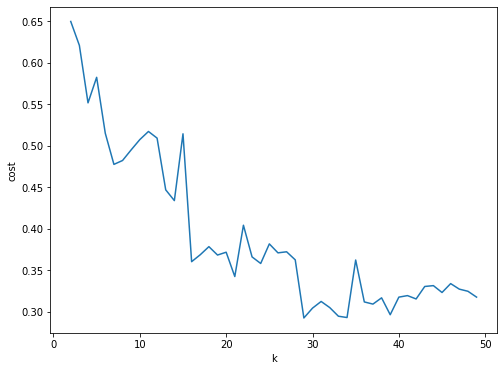

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig,ax=plt.subplots(1,1,figsize=(8,6))
ax.plot(range(2,kmax),kmcost[2:kmax])
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [45]:
from pyspark.ml.clustering import BisectingKMeans
kmax=50
bkmcost=np.zeros(kmax)
print(bkmcost)
for k in range(2,kmax):
    bkmeans=BisectingKMeans().setK(k).setSeed(1).setFeaturesCol('features')
    model=bkmeans.fit(df_kmeans)
    print('______')
    print(kmcost)
    predictions=model.transform(df_kmeans)
    evaluator=ClusteringEvaluator()
    bkmcost[k]=evaluator.evaluate(predictions)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.36221758
 0.31169128 0.30907472 0.31661251 0.29625394 0.31746996 0.31930824
 0.31526839 0.33032015 0.33134101 0.32306007 0.33378199 0.32711499
 0.32453874 0.31746924]
______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.3

______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.36221758
 0.31169128 0.30907472 0.31661251 0.29625394 0.31746996 0.31930824
 0.31526839 0.33032015 0.33134101 0.32306007 0.33378199 0.32711499
 0.32453874 0.31746924]
______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.36221758
 0.31169128 0.30907472 0

______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.36221758
 0.31169128 0.30907472 0.31661251 0.29625394 0.31746996 0.31930824
 0.31526839 0.33032015 0.33134101 0.32306007 0.33378199 0.32711499
 0.32453874 0.31746924]
______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.36221758
 0.31169128 0.30907472 0

______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.36221758
 0.31169128 0.30907472 0.31661251 0.29625394 0.31746996 0.31930824
 0.31526839 0.33032015 0.33134101 0.32306007 0.33378199 0.32711499
 0.32453874 0.31746924]
______
[0.         0.         0.64986787 0.62098611 0.55172965 0.58251814
 0.515094   0.47754444 0.4822174  0.49507616 0.50741943 0.51722156
 0.50921003 0.44683201 0.43387232 0.5144033  0.360223   0.36859372
 0.37833852 0.36822021 0.37162847 0.34229368 0.40416505 0.36596995
 0.35805194 0.38165996 0.37085142 0.37215223 0.36243063 0.29233614
 0.30419694 0.3122535  0.30482705 0.29445893 0.29286027 0.36221758
 0.31169128 0.30907472 0

Text(0, 0.5, 'cost')

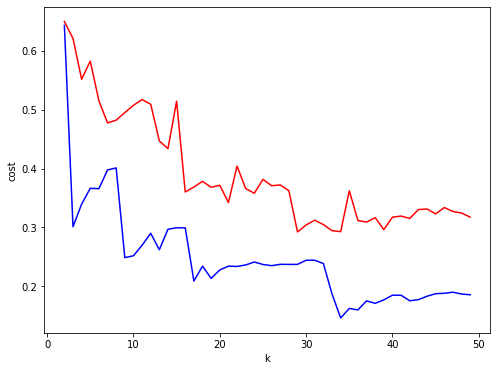

In [46]:
fig, ax = plt.subplots(1,1, figsize = (8,6))
ax.plot(range(2,kmax),bkmcost[2:kmax],color='blue')
ax.plot(range(2,kmax),kmcost[2:kmax],color='red')
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [47]:
def compare(bkmcost,kmcost):
    diff = []
    for k in range(2,kmax,2):
        temp = k,(kmcost[k]-bkmcost[k])
        diff.append(temp)
    return(diff)

diff_list = compare(bkmcost,kmcost)
diff_list

[(2, 0.006652107175816435),
 (4, 0.212167232492113),
 (6, 0.149197021653951),
 (8, 0.08113679242537197),
 (10, 0.25556859402684107),
 (12, 0.21917034747450276),
 (14, 0.13690034880731639),
 (16, 0.060908855551269736),
 (18, 0.1440708212505935),
 (20, 0.14384801713201004),
 (22, 0.17042334621101016),
 (24, 0.11681784590019828),
 (26, 0.13580492811170164),
 (28, 0.12525484280094654),
 (30, 0.05991870434868021),
 (32, 0.06617604511056821),
 (34, 0.14667031035473205),
 (36, 0.15180414353578595),
 (38, 0.14551505313929958),
 (40, 0.13258904079215292),
 (42, 0.13985887359735294),
 (44, 0.1482087114659048),
 (46, 0.1456075132014631),
 (48, 0.13768776929667498)]

In [48]:
k = 18
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)

# bkmeans = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
# model = bkmeans.fit(df_kmeans)

# Make predictions
predictions = model.transform(df_kmeans)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))
print(" ")

# Shows the cluster centers
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.37833851673376095
 
Cluster Centers: 
[2.06187699e+03 9.38135929e-01 3.34021959e+02 1.88821443e+02
 1.45285117e+02 1.75559292e+03 2.65753174e-01 1.12356230e-01
 1.74843629e-01 2.86708704e-01 6.88378632e+00 6.30178069e+00
 3.22464855e+03 1.41278473e+03 8.83989197e+02 3.10189691e-02
 1.13767573e+01]
[1.32922212e+03 8.54339700e-01 1.70761959e+03 1.09648504e+03
 6.11134556e+02 4.57184077e+02 6.72909652e-01 4.23055563e-01
 4.50592033e-01 5.81649630e-02 1.07777778e+00 2.29777778e+01
 1.38381481e+04 2.25446787e+03 4.60323579e+02 3.05142163e-01
 1.18259259e+01]
[5.68459042e+03 9.64534419e-01 5.23825625e+02 3.52145938e+02
 1.71679688e+02 8.96741968e+03 2.59589825e-01 1.09272369e-01
 1.73834325e-01 5.21832175e-01 1.83562500e+01 7.30625000e+00
 9.83312500e+03 5.76398088e+03 1.91237781e+03 3.21044875e-02
 1.12812500e+01]
[4.92042881e+03 9.46889947e-01 2.95522484e+04 2.43981768e+04
 5.15407158e+03 1.17434425e+03 8.85087684e-01 8.31579000e-01
 6.4736836

In [49]:
import pandas as pd
import numpy as np
center_pdf = pd.DataFrame(list(map(np.ravel,centers)))
center_pdf.columns = columns
center_pdf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,2061.876986,0.938136,334.021959,188.821443,145.285117,1755.592919,0.265753,0.112356,0.174844,0.286709,6.883786,6.301781,3224.648547,1412.784726,883.989197,0.031019,11.376757
1,1329.222124,0.854340,1707.619593,1096.485037,611.134556,457.184077,0.672910,0.423056,0.450592,0.058165,1.077778,22.977778,13838.148148,2254.467872,460.323579,0.305142,11.825926
2,5684.590423,0.964534,523.825625,352.145938,171.679688,8967.419679,0.259590,0.109272,0.173834,0.521832,18.356250,7.306250,9833.125000,5763.980877,1912.377810,0.032104,11.281250
3,4920.428811,0.946890,29552.248421,24398.176842,5154.071579,1174.344254,0.885088,0.831579,0.647368,0.048246,2.157895,118.894737,16026.315789,29788.071465,2876.620536,0.549242,11.894737
4,2082.873213,0.981982,8478.274775,6655.580541,1822.694234,374.254111,0.906770,0.803781,0.615820,0.053303,1.351351,85.882883,8364.414414,7294.472017,910.623587,0.427411,11.981982
5,2391.014646,0.877637,826.223591,443.540541,382.683050,3643.640649,0.371793,0.172258,0.279451,0.322347,10.127413,13.876448,5751.047151,6819.145826,1115.172697,0.145231,11.768340
6,11517.428892,0.945455,17090.364000,2591.294000,14499.070000,1230.260326,0.900000,0.300000,0.883333,0.050000,2.000000,199.800000,15520.000000,13423.652691,11939.831018,0.000000,12.000000
7,611.930203,0.849703,397.241609,178.593005,218.976273,263.180613,0.450474,0.108396,0.352649,0.091271,1.675111,8.255541,1465.517205,657.656157,437.045567,0.136825,11.221343
8,8831.194892,0.999565,1736.794402,1008.693828,728.420909,2671.805523,0.523684,0.282507,0.419914,0.297738,7.526316,26.358852,13067.703349,2717.130610,2911.288333,0.000000,11.875598
9,790.321193,0.865639,886.319531,498.003184,388.594619,218.969147,0.587145,0.306176,0.387652,0.047982,0.917969,14.954102,7489.555220,1191.122328,312.617379,0.232553,11.784180


In [50]:
predictions.limit(5).toPandas()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,features,prediction
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,"[40.900749, 0.818182, 95.4, 0.0, 95.4, 0.0, 0....",7
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,"(3202.467416, 0.909091, 0.0, 0.0, 0.0, 6442.94...",5
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,"[2495.148862, 1.0, 773.17, 773.17, 0.0, 0.0, 1...",9
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,"[1666.670542, 0.636364, 1499.0, 1499.0, 0.0, 2...",9
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,"[817.714335, 1.0, 16.0, 16.0, 0.0, 0.0, 0.0833...",7


In [51]:
predictions.groupBy("prediction").agg(min(predictions.BALANCE).alias("Min BALANCE"),max(predictions.BALANCE).alias("Max BALANCE")).show(15)

+----------+-----------+-----------+
|prediction|Min BALANCE|Max BALANCE|
+----------+-----------+-----------+
|        12| 758.118109|8097.334733|
|         1|    0.48805|5619.157028|
|        13|2748.868773|10571.41107|
|        16| 166.295463|  8767.5693|
|         6|4060.710208|19043.13856|
|         3|1268.809031|13479.28821|
|         5|        0.0|6443.077147|
|        15|1632.895642|14581.45914|
|         9|        0.0|3946.421177|
|        17|        0.0|2730.843802|
|         4| 204.329381|6773.941979|
|         8|5066.744231|18495.55855|
|         7|        0.0|2329.485768|
|        10|        0.0|6404.955912|
|        11|   4.382924|11206.78624|
+----------+-----------+-----------+
only showing top 15 rows

